In [12]:
from Kairos.notebook import Notebook


In [13]:
notebook = Notebook.load("notebooks/genetic_algorithms")


In [14]:
docstore_id_to_index = {
    docstore_id: index
    for index, docstore_id in notebook._faiss.index_to_docstore_id.items()
}

_colors = [
    "red",
    "blue",
    "green",
    "yellow",
    "orange",
    "purple",
    "pink",
    "brown",
    "grey",
]

embeddings = []
texts = []
colors = []
for i, source in enumerate(notebook.sources):
    for id in source.ids:
        embeddings.append(notebook._faiss.index.reconstruct(docstore_id_to_index[id]))
        colors.append(_colors[i % len(_colors)])
        texts.append(notebook.get_doc(id).page_content)


In [15]:
import numpy
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

matrix = numpy.array(embeddings)

tsne = TSNE(
    n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200
)
xy = tsne.fit_transform(matrix).tolist()
xyt = [(x, y, text) for (x, y), text in zip(xy, texts)]


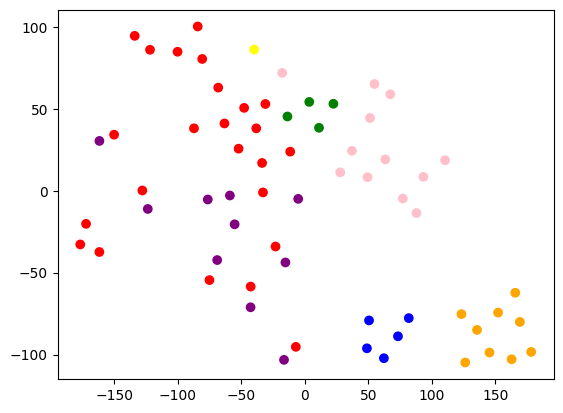

In [16]:
x = [x for x, _, _ in xyt]
y = [y for _, y, _ in xyt]

plt.scatter(
    x,
    y,
    c=colors,
)
plt.show()
